In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Data Load & Exploration

In [3]:
# Load and read dataset

df = pd.read_csv('air_quality_data.csv')
df

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Johannesburg,South Africa,2023-09-16,147.85,184.34,90.33,34.93,2.81,191.45,-1.92,65.22,15.48
9996,Berlin,Germany,2023-12-05,12.22,121.49,49.04,5.66,2.10,184.56,-9.81,12.16,10.75
9997,Moscow,Russia,2023-11-26,44.07,143.62,8.41,32.58,0.69,167.68,39.35,53.95,4.56
9998,Berlin,Germany,2023-02-03,67.43,96.79,43.23,29.19,6.01,148.50,26.21,58.54,2.71


In [5]:
# Total records
df.shape

(10000, 12)

In [6]:
# Total City 
df['City'].nunique()

20

In [7]:
# Show coloumns of data
df.columns

Index(['City', 'Country', 'Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
       'Temperature', 'Humidity', 'Wind Speed'],
      dtype='object')

In [8]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


In [10]:
# Show statistics of column

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,10000.0,77.448439,41.927871,5.02,41.1850,77.725,113.3925,149.98
PM10,10000.0,104.438161,55.062396,10.00,57.1375,103.690,152.2650,200.00
NO2,10000.0,52.198649,27.320490,5.01,28.3475,52.100,75.7050,100.00
SO2,10000.0,25.344490,14.091194,1.00,13.1900,25.350,37.5000,49.99
CO,10000.0,5.047984,2.852625,0.10,2.5600,5.090,7.4800,10.00
O3,10000.0,106.031643,55.081345,10.04,58.3800,106.055,153.9825,200.00
Temperature,10000.0,14.897150,14.443800,-10.00,2.2575,14.755,27.3825,40.00
Humidity,10000.0,55.078579,25.982232,10.01,32.5275,55.080,77.4425,99.99
Wind Speed,10000.0,10.231636,5.632628,0.50,5.2900,10.260,15.0700,20.00


In [11]:
# Show missing values

df.isnull().sum()

City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64

In [12]:
# Convert date column to datetime format for time-based analysis
# Also, add new time features like Year, Month and Month Name

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()

In [13]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


# Data Vizualitation

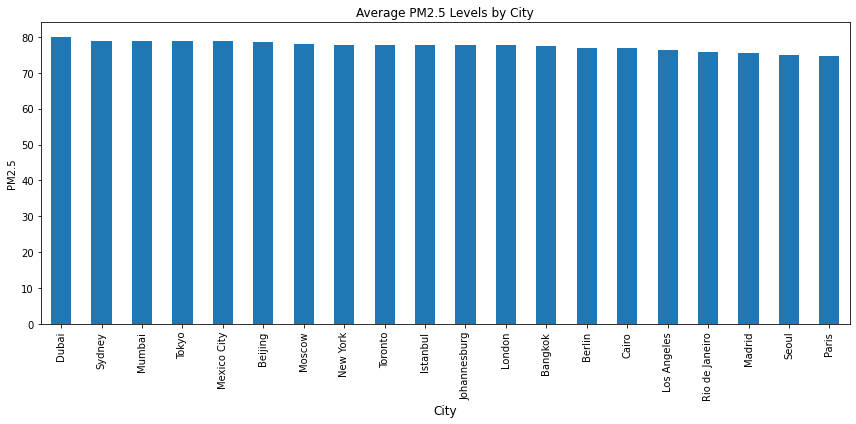

In [14]:
# PM2.5 Average levels across different cities

plt.figure(figsize=(12,6))
pm25_by_city = df.groupby('City')['PM2.5'].mean().sort_values(ascending=False)
pm25_by_city.plot(kind='bar')
plt.title('Average PM2.5 Levels by City')
plt.xlabel('City', fontsize=12)
plt.ylabel('PM2.5')
plt.tight_layout()
plt.show()

In [15]:
# 10 Cities with highest PM2.5 Levels

pm25_by_city.head(10)

City
Dubai          80.013692
Sydney         78.933560
Mumbai         78.901167
Tokyo          78.867475
Mexico City    78.855054
Beijing        78.627848
Moscow         77.878610
New York       77.857054
Toronto        77.827645
Istanbul       77.711220
Name: PM2.5, dtype: float64

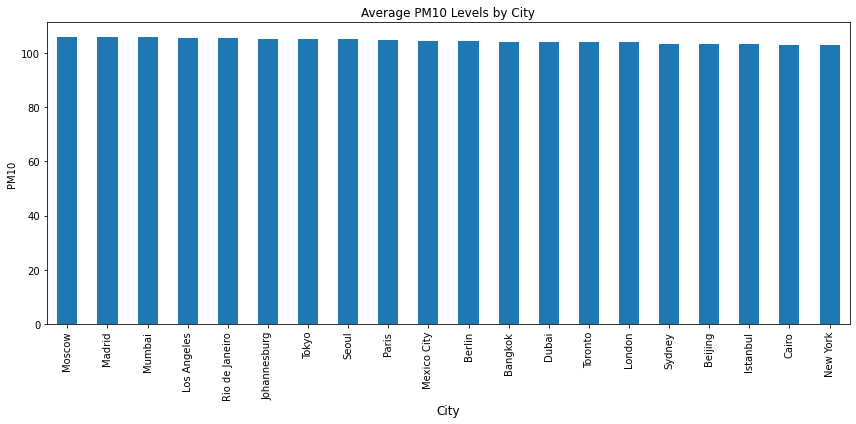

In [16]:
# Average PM10 Levels acrross different cities

plt.figure(figsize=(12,6))
pm10_by_city = df.groupby('City')['PM10'].mean().sort_values(ascending=False)
pm10_by_city.plot(kind='bar')
plt.title('Average PM10 Levels by City')
plt.xlabel('City', fontsize=12)
plt.ylabel('PM10')
plt.tight_layout()
plt.show()

In [17]:
# 10 Cities with highest PM10 Levels

pm10_by_city.head(10)

City
Moscow            105.936286
Madrid            105.870077
Mumbai            105.841667
Los Angeles       105.539416
Rio de Janeiro    105.440876
Johannesburg      105.135125
Tokyo             105.040937
Seoul             104.997222
Paris             104.642761
Mexico City       104.526868
Name: PM10, dtype: float64

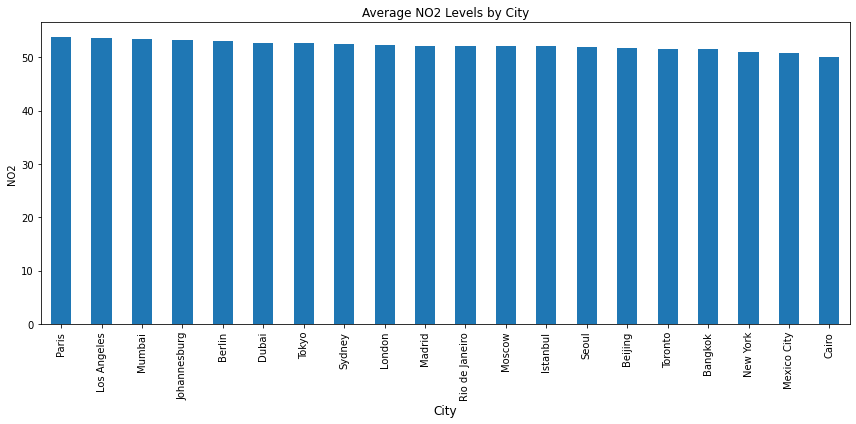

In [19]:
# Average NO2 (Nitrogen Dioxide) Levels acrross different cities

plt.figure(figsize=(12,6))
NO2_by_city = df.groupby('City')['NO2'].mean().sort_values(ascending=False)
NO2_by_city.plot(kind='bar')
plt.title('Average NO2 Levels by City')
plt.xlabel('City', fontsize=12)
plt.ylabel('NO2')
plt.tight_layout()
plt.show()

In [21]:
# 10 Cities with highest NO2 Levels

NO2_by_city.head(10)

City
Paris           53.818487
Los Angeles     53.521207
Mumbai          53.344074
Johannesburg    53.146929
Berlin          52.955607
Dubai           52.683038
Tokyo           52.672770
Sydney          52.474938
London          52.334581
Madrid          52.144537
Name: NO2, dtype: float64

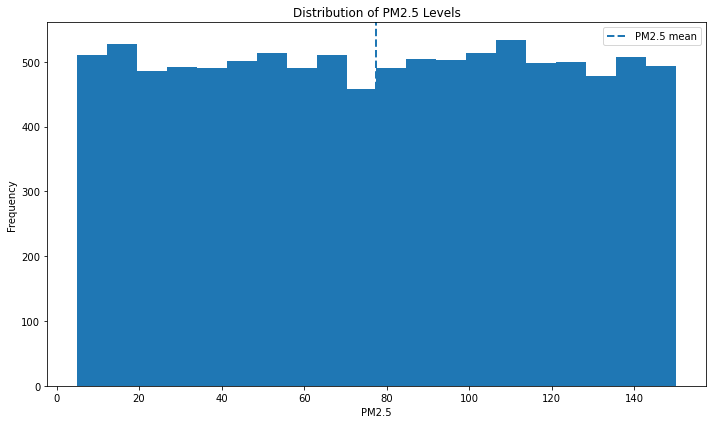

In [23]:
# Distribution of PM2.5 values across all measurements

plt.figure(figsize=(10,6))
plt.hist(df['PM2.5'], bins=20)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.axvline(df['PM2.5'].mean(),linestyle='--',linewidth=2,label='PM2.5 mean')
plt.legend()
plt.tight_layout()
plt.show()

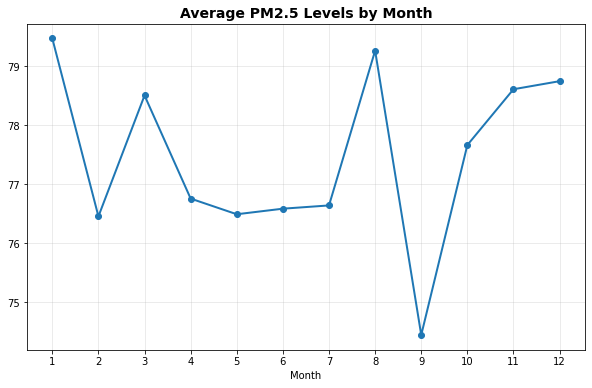

In [24]:
# Monthly PM2.5 Trends

plt.figure(figsize=(10,6))
monthly_pm25 = df.groupby('Month')['PM2.5'].mean()
plt.plot(monthly_pm25.index, monthly_pm25.values, marker='o', linewidth=2)
plt.title('Average PM2.5 Levels by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.xticks(range(1,13))
plt.grid(True,alpha=0.3)
plt.show()

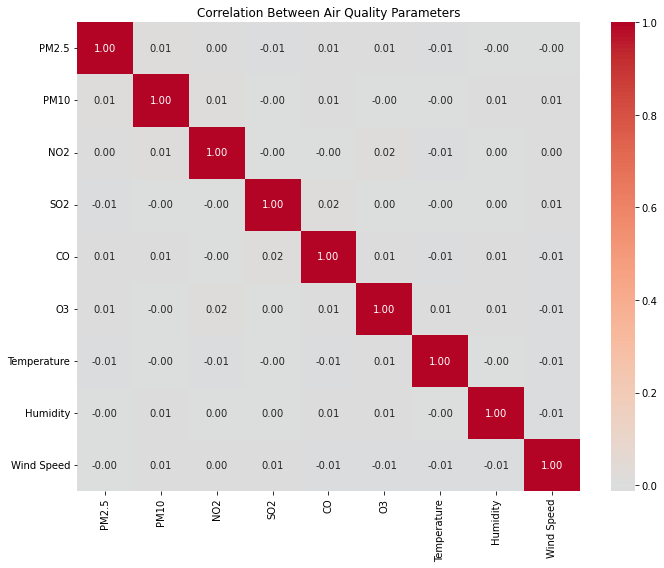

In [30]:
# Correlation Heatmap
# Heatmap showing correlations between different air quality parameters

plt.figure(figsize=(10,8))
pollutants =['PM2.5', 'PM10', 'NO2', 'SO2', 'CO','O3','Temperature','Humidity','Wind Speed']
correlation = df[pollutants].corr()
sns.heatmap(correlation, annot= True, fmt='.2f', cmap='coolwarm',center=0)
plt.title('Correlation Between Air Quality Parameters')
plt.tight_layout()
plt.show()

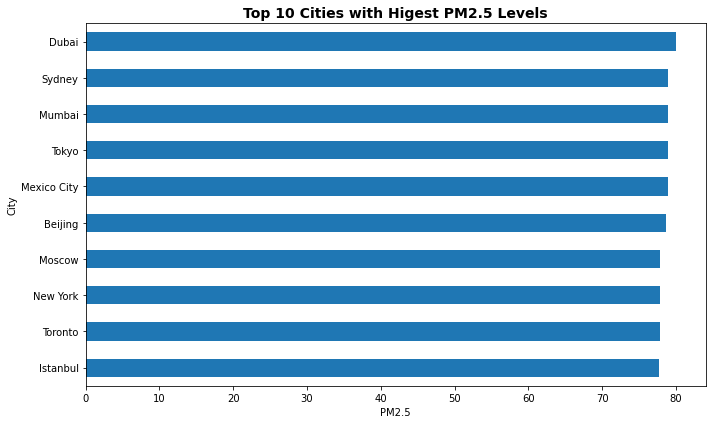

In [32]:
# Focus on Top 10 cities with highest average PM2.5 levels

plt.figure(figsize=(10,6))
top10_pm25 = df.groupby('City')['PM2.5'].mean().nlargest(10).sort_values(ascending=True)
top10_pm25.plot(kind='barh')
plt.title('Top 10 Cities with Higest PM2.5 Levels', fontsize=14, fontweight='bold')
plt.xlabel('PM2.5')
plt.ylabel('City')
plt.tight_layout()
plt.show()

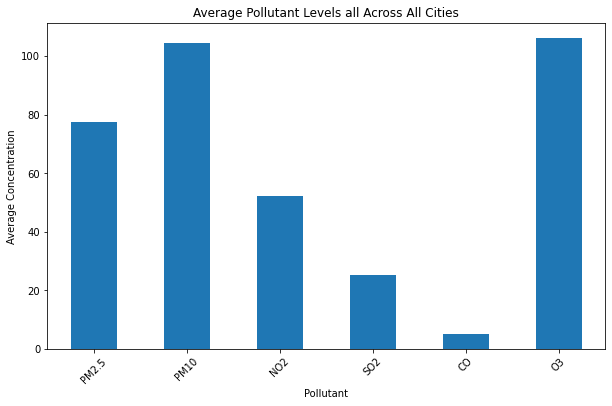

In [33]:
# Multiple Pollutants Comparison
# Compare average levels of different pollutants across all cities 

pollutant_means = df[['PM2.5', 'PM10', 'NO2', 'SO2','CO','O3']].mean()

plt.figure(figsize=(10,6))
pollutant_means.plot(kind='bar')
plt.title('Average Pollutant Levels all Across All Cities')
plt.xlabel('Pollutant')
plt.ylabel('Average Concentration')
plt.xticks(rotation=45)
plt.show()

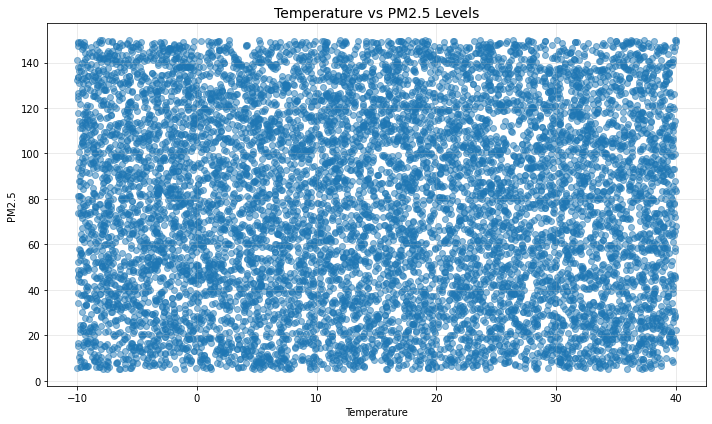

In [34]:
# Temperature vs PM2.5 
# Scatter plot to explore relationships between temperature and PM2.5

plt.figure(figsize=(10,6))
plt.scatter(df['Temperature'],df['PM2.5'],alpha=0.5)
plt.title('Temperature vs PM2.5 Levels', fontsize=14)
plt.xlabel('Temperature')
plt.ylabel('PM2.5')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [37]:
# Air Quality Summary Statistics by City

# Create a summary table with key statistics for each city

summary_stats = df.groupby('City').agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'NO2' : 'mean',
    'SO2' : 'mean',
    'Temperature' : 'mean',
    'Humidity' : 'mean'
}).round(2)

summary_stats.columns = ['Avg PM2.5','Avg PM10','Avg NO2','Avg SO2','Avg Temp','Avg Humidity']
summary_stats = summary_stats.sort_values('Avg PM2.5', ascending=False)

summary_stats

,Avg PM2.5,Avg PM10,Avg NO2,Avg SO2,Avg Temp,Avg Humidity
City,,,,,,
Dubai,80.01,103.89,52.68,24.96,14.85,56.46
Sydney,78.93,103.37,52.47,25.68,14.12,55.66
Mumbai,78.90,105.84,53.34,25.03,14.23,54.28
Tokyo,78.87,105.04,52.67,27.98,13.94,54.41
Mexico City,78.86,104.53,50.86,26.02,15.41,56.18
Beijing,78.63,103.19,51.62,24.90,14.11,54.28
Moscow,77.88,105.94,52.03,26.11,15.51,55.70
New York,77.86,102.95,51.00,25.17,14.77,54.66
Toronto,77.83,103.87,51.55,24.80,15.15,55.80


In [38]:
# Identify Cities Exceeding  WHO Guidelines
# WHO Air Guidelines : PM2.5 should not exceed 15 vg/m3 (annual mean)
# PM10 should not exceed 45 vg/m3 (annual mean)

who_pm25_limit = 15
who_pm10_limit = 45

city_avg = df.groupby('City').agg(
{
    'PM2.5' : 'mean',
    'PM10' : 'mean'
}).round(2)

exceeding_pm25 = city_avg[city_avg['PM2.5'] > who_pm25_limit]
exceeding_pm10 = city_avg[city_avg['PM10'] > who_pm10_limit]

print(f"Cities exceeding WHO PM2.5 guideline ({who_pm25_limit} vg/m3):")
exceeding_pm25.sort_values('PM2.5',ascending=False)


Cities exceeding WHO PM2.5 guideline (15 vg/m3):


,PM2.5,PM10
City,,
Dubai,80.01,103.89
Sydney,78.93,103.37
Mumbai,78.90,105.84
Tokyo,78.87,105.04
Mexico City,78.86,104.53
Beijing,78.63,103.19
Moscow,77.88,105.94
New York,77.86,102.95
Toronto,77.83,103.87


##### Overview : This analysis examines air quality data from multiple cities worldwide to assess pollution levels and their implications for urban planning and zoning regulations.


#### Key Findings:
##### 1. Pollution Severity:
- PM2.5 Levels vary significantly across cities
- Most cities exceed WHO air quality guidelines
- Average PM2.5 concentrational across all cities
- WHO guideline for PM2.5 = 15 vg/m3 (annual mean)

##### 2. Most Polluted Cities:
The cities with highest PM2.5 levels (Dubai, Sydney, Mumbai, etc) require immidiate attention for: 
- Stricter emision controls
- Enhanced public transportation
- Green space development
- Air quality monitoring stations

##### 3. Seasonal Patterns:
- Air quality shows monthly variations 
- Winter months may show higher pollutions due to heating
- Understanding these patterns helps in planning seasonal interventions

##### 4. Enviromental Factors:
- Temparature and wind speed show correlation with pollution levels
- Higher wind speeds generally associated with better air dispersion
- These factors should be considered in zoning decisions

#### Recommendation for Urban Planning:
##### 1. Immadiate Actions:
- Prioritize air quality improvements in cities exceeding WHO guidelines
- Implement Low Emission Zones (LEZ) in highly polluted areas
- Increase monitoring stations in critical zones


##### 2. Zoning Regulations:
- Limit industrial activities near residential areas

##### 3. Other Reccomendation
- Invest in public transportation in high-pollution cities
- Transition to renewable energy sources
- Develop public health advisories based on air quality data

In [40]:
# Summary Report

summary_report = {
    'Total Records' : len(df),
    'Number of Cities' : df['City'].nunique(),
    'Date Range' : f"{df['Date'].min()} to {df['Date'].max()}",
    'Average PM2.5' : df['PM2.5'].mean(),
    'Average PM10' : df['PM10'].mean(),
    'Average NO2' : df['NO2'].mean(),
    'Average SO2' : df['SO2'].mean()
}

print("Summary Report:")
for key, value in summary_report.items():
    print(f"{key}: {value}")

Summary Report:
Total Records: 10000
Number of Cities: 20
Date Range: 2023-01-01 00:00:00 to 2023-12-28 00:00:00
Average PM2.5: 77.44843900000016
Average PM10: 104.43816100000004
Average NO2: 52.1986489999999
Average SO2: 25.344490000000057
